# **>>> Initializarion**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time, os, math
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/ucid_v2.zip

**CAUTION : Run the following cell only once.**

In [ ]:
!mkdir /content/drive/MyDrive/MF_Detection_Results

# **>>> Declaring Required Functions**

In [ ]:
def summer(mat, d):
  irp, icp = mat.shape
  temp = np.zeros(mat.shape)

  for i in range(icp):
    temp[0, i] = np.sum(mat[:d, i])
    for j in range(1, irp-d+1):
        temp[j, i] = temp[j-1, i] + mat[d+j-1, i] - mat[j-1, i]
  return temp

def custom_var(img, d, tau):
  pow_1 = np.pad(img, d // 2, mode='constant').astype('int32')
  pow_2 = pow_1 ** 2

  ir, ic = img.shape
  irp, icp = pow_1.shape
  
  pow_1_sum = summer(pow_1, d)
  pow_2_sum = summer(pow_2, d)

  res_var = np.zeros(img.shape)

  for i in range(ir):
    var_1 = np.sum(pow_1[i:i+d, :d])
    var_2 = np.sum(pow_2[i:i+d, :d])
    res_var[i, 0] = abs(var_2 / 49 - (var_1**2) / 2401)
    for j in range(1, ic):
        var_1 = var_1 - pow_1_sum[i, j-1] + pow_1_sum[i, j+d-1]
        var_2 = var_2 - pow_2_sum[i, j-1] + pow_2_sum[i, j+d-1]
        res_var[i, j] = abs(var_2 / 49 - (var_1**2) / 2401)
  return (res_var >= tau).astype('int8')


In [ ]:
def detector(img, d, tau):
  ir, ic = img.shape

  # Calculate nabla matrices
  temp_row = np.concatenate((np.zeros((ir, 1), dtype='int16'), img[:, :-1]), axis=1)
  temp_col = np.concatenate((np.zeros((1, ic), dtype='int16'), img[:-1, :]), axis=0)
  nabla_row = (img - temp_row == 0).astype('int8')
  nabla_col = (img - temp_col == 0).astype('int8')

  # Calculate Variance matrix
  var = custom_var(img, d, tau)

  # Calculate f value
  fr = np.sum(nabla_row * var) / np.sum(var)
  fc = np.sum(nabla_col * var) / np.sum(var)

  return fr/(2 ** 0.5) + fc/(2 ** 0.5)

In [ ]:
def dynamic_progressbar(i, n=1338):
  p = math.ceil((i * 100) / n)
  b = math.ceil(p / 4)
  print(f'\rProgress : [{"#" * b}{"-" * (25 - b)}]  {p} %', end='')

def timer(t):
  dur = time.time() - t
  min, sec = divmod(dur, 60)
  hour, min = divmod(min, 60)
  if hour > 0: print(f"Running Time : {int(hour)}h {int(min)}m {int(sec)}s")
  else: print(f"Running Time : {int(min)}m {int(sec)}s")

# **1. Original Images**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('original_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 23m 50s


In [ ]:
!cp /content/original_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **2. 3x3 Median Filter**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  img = img.filter(ImageFilter.MedianFilter(size=3))
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('median_3x3_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 24m 20s


In [ ]:
!cp /content/median_3x3_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **3. 5x5 Median Filter**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  img = img.filter(ImageFilter.MedianFilter(size=5))
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('median_5x5_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 25m 28s


In [ ]:
!cp /content/median_5x5_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **4. 7x7 Median Filter**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  img = img.filter(ImageFilter.MedianFilter(size=7))
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('median_7x7_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 26m 33s


In [ ]:
!cp /content/median_7x7_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **5. 9x9 Median Filter**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  img = img.filter(ImageFilter.MedianFilter(size=9))
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('median_9x9_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 27m 43s


In [ ]:
!cp /content/median_9x9_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **6. Bilinear Scaling with scaling factor s = 0.6**

In [ ]:
d, tau, s = 7, 100, 0.6

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  width, height = img.size
  width, height = int(width * s), int(height * s)
  img = img.resize((width, height), Image.BILINEAR)
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('bilinear_0-6_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 8m 55s


In [ ]:
!cp /content/bilinear_0-6_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **7. Bilinear Scaling with scaling factor s = 2**

In [ ]:
d, tau, s = 7, 100, 2

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  width, height = img.size
  width, height = int(width * s), int(height * s)
  img = img.resize((width, height), Image.BILINEAR)
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('bilinear_2_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 1h 38m 26s


In [ ]:
!cp /content/bilinear_2_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **8. Gaussian filtering with delt = 0.5**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  img = img.filter(ImageFilter.GaussianBlur(radius=0.5))
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('gaussian_0-5_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 23m 22s


In [ ]:
!cp /content/gaussian_0-5_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **9. Gaussian filtering with delt = 1.5**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  img = img.filter(ImageFilter.GaussianBlur(radius=1.5))
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('gaussian_1-5_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 23m 21s


In [ ]:
!cp /content/gaussian_1-5_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **10. 3x3 Average Filter**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  img = img.filter(ImageFilter.BoxBlur(radius=1))
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('average_3x3_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 24m 21s


In [ ]:
!cp /content/average_3x3_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **11. 5x5 Average Filter**

In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  img = img.filter(ImageFilter.BoxBlur(radius=2))
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('average_5x5_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 23m 47s


In [ ]:
!cp /content/average_5x5_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **12. JPEG Compressed with Quality Q = 55**

In [ ]:
!mkdir JPEG_55

Convert TIF images into JPEG images with Quality=55

In [ ]:
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  f = f.split('.')[0]
  img.save(f'/content/JPEG_55/{f}.jpg', quality=55)
  dynamic_progressbar(i)

print()
timer(t)

Progress : [#########################]  100 %
Running Time : 0m 9s


In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/JPEG_55')):
  img = Image.open(f'/content/JPEG_55/{f}').convert('L')
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('JPEG_55_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 22m 13s


In [ ]:
!cp /content/JPEG_55_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **13. JPEG Compressed with Quality Q = 75**

In [ ]:
!mkdir JPEG_75

Convert TIF images into JPEG images with Quality=75

In [ ]:
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  f = f.split('.')[0]
  img.save(f'/content/JPEG_75/{f}.jpg', quality=75)
  dynamic_progressbar(i)

print()
timer(t)

Progress : [#########################]  100 %
Running Time : 0m 9s


In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/JPEG_75')):
  img = Image.open(f'/content/JPEG_75/{f}').convert('L')
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('JPEG_75_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 22m 16s


In [ ]:
!cp /content/JPEG_75_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **14. JPEG Compressed with Quality Q = 95**

In [ ]:
!mkdir JPEG_95

Convert TIF images into JPEG images with Quality=95

In [ ]:
t = time.time()

for i, f in enumerate(os.listdir('/content/ucid.v2')):
  img = Image.open(f'/content/ucid.v2/{f}').convert('L')
  f = f.split('.')[0]
  img.save(f'/content/JPEG_95/{f}.jpg', quality=95)
  dynamic_progressbar(i)

print()
timer(t)

Progress : [#########################]  100 %
Running Time : 0m 13s


In [ ]:
d, tau = 7, 100

result = []
t = time.time()

for i, f in enumerate(os.listdir('/content/JPEG_95')):
  img = Image.open(f'/content/JPEG_95/{f}').convert('L')
  result.append(detector(np.array(img), d, tau))
  dynamic_progressbar(i)

print()
timer(t)

f = open('JPEG_95_result.txt', 'w')
f.write(str(result))
f.close()

Progress : [#########################]  100 %
Running Time : 23m 35s


In [ ]:
!cp /content/JPEG_95_result.txt /content/drive/MyDrive/MF_Detection_Results/.

# **Building Scatter-plot**

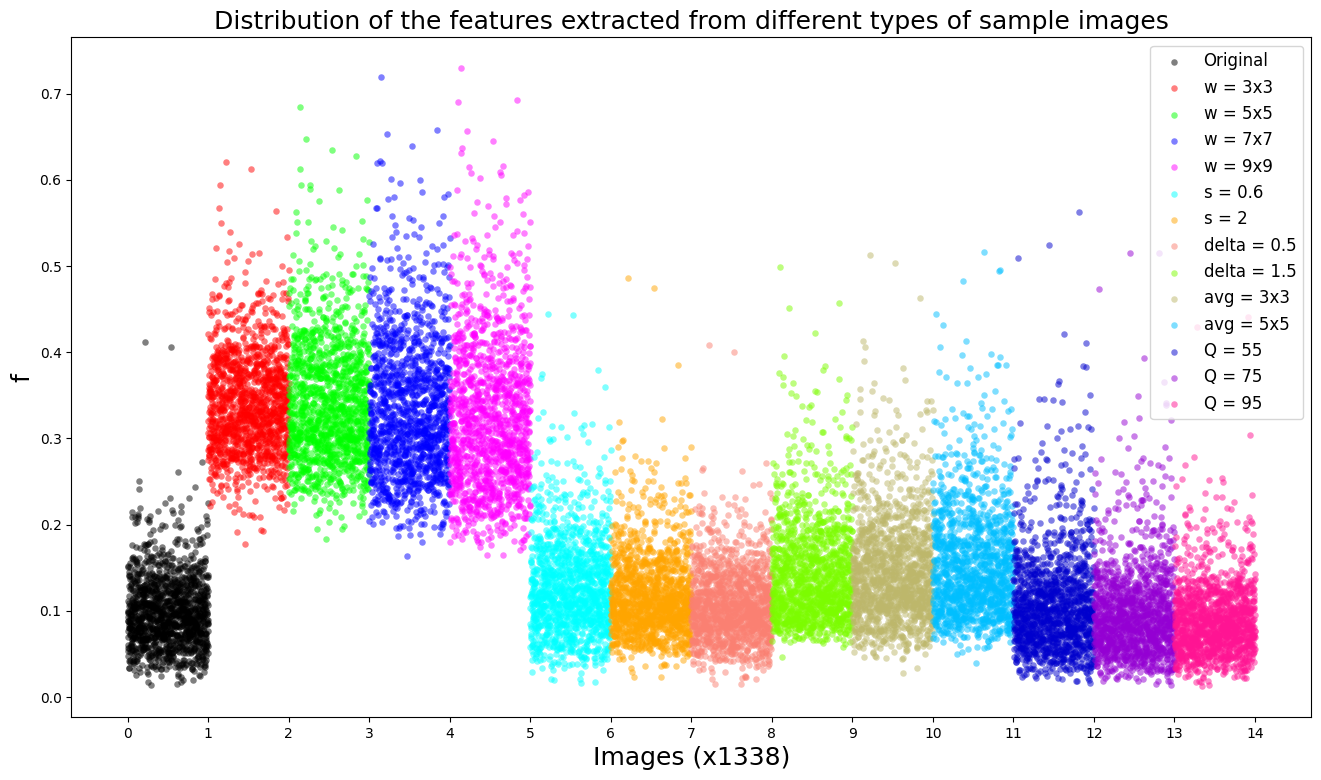

In [ ]:
plt.figure(figsize=(16, 9), dpi=100)
x_axis = np.array([i/1338 for i in range(1, 1339)])

p_size = 22
p_alpha = 0.5

# Plotting Original Images Results
f = open('/content/drive/MyDrive/MF_Detection_Results/original_result.txt', 'r')
plt.scatter(x_axis+0, eval(f.read()), c='k', label='Original', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting 3x3 Median Filtered Results
f = open('/content/drive/MyDrive/MF_Detection_Results/median_3x3_result.txt', 'r')
plt.scatter(x_axis+1, eval(f.read()), c='r', label='w = 3x3', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting 5x5 Median Filtered Results
f = open('/content/drive/MyDrive/MF_Detection_Results/median_5x5_result.txt', 'r')
plt.scatter(x_axis+2, eval(f.read()), c='lime', label='w = 5x5', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting 7x7 Median Filtered Results
f = open('/content/drive/MyDrive/MF_Detection_Results/median_7x7_result.txt', 'r')
plt.scatter(x_axis+3, eval(f.read()), c='b', label='w = 7x7', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting 9x9 Median Filtered Results
f = open('/content/drive/MyDrive/MF_Detection_Results/median_9x9_result.txt', 'r')
plt.scatter(x_axis+4, eval(f.read()), c='fuchsia', label='w = 9x9', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting Bilinear Scaling with s = 0.6
f = open('/content/drive/MyDrive/MF_Detection_Results/bilinear_0-6_result.txt', 'r')
plt.scatter(x_axis+5, eval(f.read()), c='aqua', label='s = 0.6', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting Bilinear Scaling with s = 2
f = open('/content/drive/MyDrive/MF_Detection_Results/bilinear_2_result.txt', 'r')
plt.scatter(x_axis+6, eval(f.read()), c='orange', label='s = 2', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting Gaussian Filtered Results with delta = 0.5
f = open('/content/drive/MyDrive/MF_Detection_Results/gaussian_0-5_result.txt', 'r')
plt.scatter(x_axis+7, eval(f.read()), c='salmon', label='delta = 0.5', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting Gaussian Filtered Results with delta = 1.5
f = open('/content/drive/MyDrive/MF_Detection_Results/gaussian_1-5_result.txt', 'r')
plt.scatter(x_axis+8, eval(f.read()), c='lawngreen', label='delta = 1.5', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting 3x3 Average Filtered Results
f = open('/content/drive/MyDrive/MF_Detection_Results/average_3x3_result.txt', 'r')
plt.scatter(x_axis+9, eval(f.read()), c='darkkhaki', label='avg = 3x3', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting 5x5 Average Filtered Results
f = open('/content/drive/MyDrive/MF_Detection_Results/average_5x5_result.txt', 'r')
plt.scatter(x_axis+10, eval(f.read()), c='deepskyblue', label='avg = 5x5', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting JPEG Compressed with Quality = 55 Results 
f = open('/content/drive/MyDrive/MF_Detection_Results/JPEG_55_result.txt', 'r')
plt.scatter(x_axis+11, eval(f.read()), c='mediumblue', label='Q = 55', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting JPEG Compressed with Quality = 75 Results 
f = open('/content/drive/MyDrive/MF_Detection_Results/JPEG_75_result.txt', 'r')
plt.scatter(x_axis+12, eval(f.read()), c='darkviolet', label='Q = 75', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

# Plotting JPEG Compressed with Quality = 95 Results 
f = open('/content/drive/MyDrive/MF_Detection_Results/JPEG_95_result.txt', 'r')
plt.scatter(x_axis+13, eval(f.read()), c='deeppink', label='Q = 95', s=p_size, alpha=p_alpha, linewidth=0)
f.close()

plt.title('Distribution of the features extracted from different types of sample images', fontsize=18)
plt.xlabel('Images (x1338)', fontsize=18)
plt.ylabel('f', fontsize=18)
plt.legend(prop={"size":12}, loc="upper right")
plt.locator_params(axis="x", nbins=20)
plt.savefig('figure.png')
plt.show()